In [41]:
from __future__ import division
from lsst.sims.ocs.downtime.unscheduled_downtime import UnscheduledDowntime
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

In [42]:
ud = UnscheduledDowntime()
# Twenty year survey in days
survey_length = 7300
do_random = True
#seed = 1493549270
#seed = 1493603680
#seed = 1496768070
#seed = 1499405450
seed = 1516231120#!!
#seed = 1549655450#!
#seed = 1597521980#!
#seed = 1611641900#!
#seed = 1615934760#?
#seed = 1629744830
ud.initialize(use_random_seed=do_random, random_seed=seed)

In [43]:
print("Total Number of Downtimes: {}".format(len(ud)))
print("Total Downtime: {} days".format(ud.total_downtime))
print("Percent of Survey Time: {:.1f}%".format(ud.total_downtime / survey_length * 100.0))
print("Fraction of Days per Downtime: {:.3f}%".format(ud.total_downtime / len(ud)))

Total Number of Downtimes: 158
Total Downtime: 322 days
Percent of Survey Time: 4.4%
Fraction of Days per Downtime: 2.038%


In [44]:
# Create arrays for the downtime modes
nights = np.arange(survey_length) + 1
minor = np.zeros(survey_length)
intermediate = np.zeros(survey_length)
major = np.zeros(survey_length)
catastrophic = np.zeros(survey_length)
total = np.ones(8192)

In [45]:
for (n, duration, event_type) in ud.downtimes:
    if event_type.startswith("minor"):
        minor[n - 1] = duration
        total[n - 1] = 0
    if event_type.startswith("intermediate"):
        intermediate[n - 1] = duration
        total[n - 1] = 0
    if event_type.startswith("major"):
        major[n - 1] = duration
        total[n - 1] = 0
    if event_type.startswith("catastrophic"):
        catastrophic[n - 1] = duration
        total[n - 1] = 0

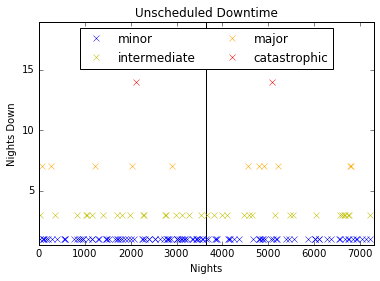

In [51]:
plt.plot(nights, minor, 'bx', label='minor')
plt.plot(nights, intermediate, 'yx', label='intermediate')
plt.plot(nights, major, 'x', color="orange", label='major')
plt.plot(nights, catastrophic, 'rx', label='catastrophic')
plt.xlim(1, survey_length)
ymin = ud.MINOR_EVENT[1] - 0.5
ymax = ud.CATASTROPHIC_EVENT[1] + 5
plt.ylim(ymin, ymax)
plt.title("Unscheduled Downtime")
plt.xlabel("Nights")
plt.ylabel("Nights Down")
plt.legend(loc='upper center', numpoints=1, ncol=2)
plt.vlines(3650, ymin, ymax)

In [52]:
index = np.searchsorted(nights, 3651)
print(nights[index:index+2])
first_ten = np.sum(catastrophic[:index]) + np.sum(major[:index]) + np.sum(intermediate[:index]) + np.sum(minor[:index])
print("Downtime days in first ten years: {}".format(first_ten))
sec_ten = np.sum(catastrophic[index:]) + np.sum(major[index:]) + np.sum(intermediate[index:]) + np.sum(minor[index:])
print("Downtime days in second ten years: {}".format(sec_ten))

[3651 3652]
Downtime days in first ten years: 170.0
Downtime days in second ten years: 152.0


In [53]:
def statistics(label, nights, down_arr):
    mask = nights[down_arr > 0]
    diff = mask[1:] - mask[:-1]
    mean = np.mean(diff)
    print("{} Events".format(label))
    print("Total Number: {}".format(len(mask)))
    print("Time to First Failure: {} days".format(mask[0]))
    print("Mean Time Between Failures: {} days".format(mean))
    print("Median Time Between Failures: {} days".format(np.median(diff)))
    print("Standard Deviation of Time Between Failures: {} days".format(np.std(diff)))

In [54]:
statistics("Catastrophic", nights, catastrophic)
statistics("Major", nights, major)
statistics("Intermediate", nights, intermediate)
statistics("Minor", nights, minor)

Catastrophic Events
Total Number: 2
Time to First Failure: 2122 days
Mean Time Between Failures: 2966.0 days
Median Time Between Failures: 2966.0 days
Standard Deviation of Time Between Failures: 0.0 days
Major Events
Total Number: 11
Time to First Failure: 59 days
Mean Time Between Failures: 674.4 days
Median Time Between Failures: 552.5 days
Standard Deviation of Time Between Failures: 568.064292136 days
Intermediate Events
Total Number: 36
Time to First Failure: 32 days
Mean Time Between Failures: 205.6 days
Median Time Between Failures: 151.0 days
Standard Deviation of Time Between Failures: 161.45626564 days
Minor Events
Total Number: 109
Time to First Failure: 29 days
Mean Time Between Failures: 66.5833333333 days
Median Time Between Failures: 49.5 days
Standard Deviation of Time Between Failures: 60.5391096424 days


In [55]:
x = np.arange(8192)
y1 = np.sin(2. * np.pi * (1. / 21.) * x)
dtc1 = y1 * total
y2 = np.sin(2. * np.pi * (1. / 28.) * x)
dtc2 = y2 * total
y3 = np.sin(2. * np.pi * (1. / 14.) * x)
dtc3 = y3 * total

(0, 56)

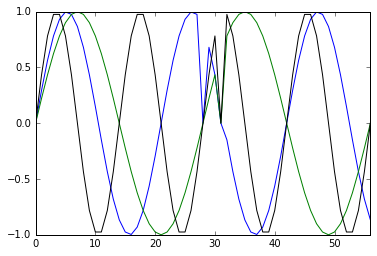

In [56]:
plt.plot(x, dtc1)
plt.plot(x, dtc2, 'g')
plt.plot(x, dtc3, 'k')
plt.xlim(0, 56)

In [57]:
def do_fft(signal):
    k = np.arange(len(signal))
    frq = k[range(len(signal) // 2)]

    Y = np.fft.fft(signal) / len(signal)
    Y = Y[range(len(signal) // 2)]
    return frq, Y

In [58]:
f1, Y1 = do_fft(dtc1)
f2, Y2 = do_fft(dtc2)
f3, Y3 = do_fft(dtc3)

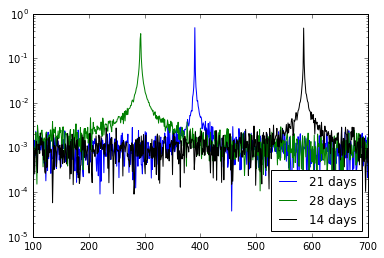

In [59]:
plt.plot(f1, abs(Y1), label="21 days")
plt.plot(f2, abs(Y2), 'g', label="28 days")
plt.plot(f3, abs(Y3), 'k', label="14 days")
plt.xlim(100, 700)
plt.yscale('log')
plt.legend(loc=4)

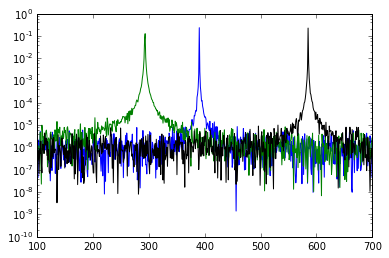

In [60]:
plt.plot(f1, abs(Y1)**2)
plt.plot(f2, abs(Y2)**2, 'g')
plt.plot(f3, abs(Y3)**2, 'k')
plt.xlim(100, 700)
plt.yscale('log')

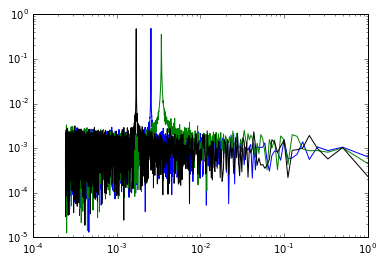

In [61]:
plt.plot(1/f1[1:], abs(Y1[1:]))
plt.plot(1/f2[1:], abs(Y2[1:]), 'g')
plt.plot(1/f3[1:], abs(Y3[1:]), 'k')
#plt.xlim(100, 700)
plt.yscale('log')
plt.xscale('log')